# JAFFE Facial Affect Detection

Facial affect detection based on the modified LeNet Convolution Neural Network architecture for digit recognition.

In [1]:
# Libraries and Dependencies Import
%matplotlib inline
import sys
import os
import time
import fnmatch

from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import theano
import theano.tensor as T

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using Theano backend.


## Import and Preprocess Dataset

In [2]:
# Dataset File Locations
image_path = '/storage/home/yjo5006/work/Datasets/jaffe/'
label_path = 'semantic_ratings.txt'

# Input Image Dimensions (Each image is 28 by 28 pixels)
img_rows, img_cols = 256, 256

# Training Parameters
# batch_size = # Utilize an online learning method instead
nb_classes = 7

In [15]:
# Load Image Function
def loadImages(filepath, imageNames):
    print 'Loading image datasets...'
    image_set = []
    label_set = []
    
    for imgFile in imageNames:
        imgFile = str(imgFile).replace('-', '.')
        for file in os.listdir(filepath):
            if imgFile in file:
                image = mpimg.imread(filepath + file, True)
                if len(image.shape) == 3: image = image[:, :, 0]
                image_set.append(image)
                label_set.append(getID(file[3:5]))
    return np.array(image_set), np.array(label_set)

# Load Semantic Labels
def loadLabels(filepath):
    print 'Loading dataset labels...'
    data = np.genfromtxt(label_path, dtype=[('index','i8'),('happy','f8'),
                        ('sad','f8'),('surprised','f8'),
                        ('angry','f8'),('disgust','f8'),
                        ('fear','f8'),('filename','S6')])
    return data

def getID(label):
    return ['NE', 'HA', 'SA', 'SU', 'AN', 'DI', 'FE'].index(label)

def getLabel(id):
	return ['Neutral', 'Happy', 'Sad', 'Surprised', 'Angry', 'Disgust', 'Fear'][id]

In [4]:
# Import Dataset
labels = loadLabels(label_path)
X, y = loadImages(image_path, labels['filename'])


print 'Reshaping raw dataset...'
# Reshape the image data by a single-channel (grey-scale) and by the dim of images.
X = X.reshape(X.shape[0], 1, img_rows, img_cols)
X = X.astype('float32')
X /= 255

# Convert Class Vectors to Binary Class Matricies
print 'Converting y-label encoding...'
y = np_utils.to_categorical(y, nb_classes)
print 'Encoding Sample for y[0]: {}'.format(y[0, :])

# Split Dataset into Train and Test Sets
print 'Splitting dataset into train and test sets...'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print '\n[Dataset Summary]'
print 'X_train shape: ', X_train.shape
print X_train.shape[0], ' train samples'
print X_test.shape[0], ' test samples'

Loading dataset labels...
Loading image datasets...
Reshaping raw dataset...
Converting y-label encoding...
Encoding Sample for y[0]: [ 1.  0.  0.  0.  0.  0.  0.]
Splitting dataset into train and test sets...

[Dataset Summary]
X_train shape:  (142, 1, 256, 256)
142  train samples
70  test samples


## Plot Sample Images

Generating visualization of first 9 samples...


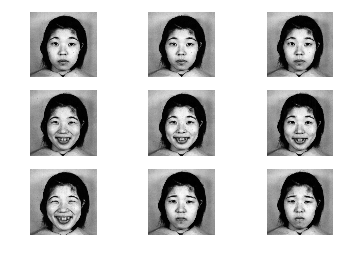

In [5]:
# Plot Sample Images
print 'Generating visualization of first 9 samples...'
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i, 0], cmap='gray')
    plt.axis('off')
plt.show()

## Build Model

In [9]:
print 'Building the neural network...'
model = Sequential()	# Initialize model object

# Input Image: 1 channel grayscale, 28 x 28 image

# Layer C1 - Convolution layer with 6 feature maps, 5 x 5 kernel for each feature map
model.add(Convolution2D(6, 5, 5, input_shape=(1, img_rows, img_cols), border_mode='same'))

# Activation 1 - Rectified Linear Unit (ReLU) Neuron Layer:
model.add(Activation('relu'))

# Layer S1 - Subsampling layer with 6 feature maps, 2 x 2 kernel for each feature map
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer C2 - Convolution layer with 16 feature maps, 5 x 5 kernel for each feature map
model.add(Convolution2D(16, 5, 5, border_mode='same'))

# Activation 2 - Rectified Linear Unit (ReLU) Neuron Layer:
model.add(Activation('relu'))

# Layer S2 - Subsampling layer with 16 feature maps, 2 x 2 kernel for each feature map
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer C3 - Convolution layer with 120 feature maps, 5 x 5 kernel for each feature map
model.add(Convolution2D(120, 5, 5))

# Activation 3 - Rectified Linear Unit (ReLU) Neuron Layer:
model.add(Activation('relu'))

# Dropout 1 - Drop out layer of 25% of the weights
model.add(Dropout(0.25))

# Flatten the Image
model.add(Flatten())

# Fully Connected Layer 1 - 84 Neurons
model.add(Dense(84))

# Activation 4 - Rectified Linear Unit (ReLU) Neuron Layer:
model.add(Activation('relu'))

# Dropout 2 - Drop out layer of 50% of the weights
model.add(Dropout(0.5))

# Fully Connected Layer 1 - 10 Neurons (for each class of the digits)
model.add(Dense(nb_classes))

# Activation 5 - Softmax Nonlineararity Activation Neuron Layer:
# Rescales the output out of one; interpret as a probability
model.add(Activation('softmax'))

Building the neural network...


## Compile Network

In [10]:
print 'Compiling the network...'
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

Compiling the network...


## Train Neural Network

In [13]:
print 'Training the neural network...'

nb_epoch = 100

model.fit(X_train, y_train, batch_size=X_train.shape[0], 
          nb_epoch=nb_epoch, show_accuracy=True, verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, show_accuracy=True, verbose=0)
print 'Test score: ', score[0]
print 'Test accuracy: ', score[1]

Training the neural network...
Train on 142 samples, validate on 70 samples
Epoch 1/100
142/142 [==============================] - 17s - loss: 1.4757 - acc: 0.4930 - val_loss: 1.6647 - val_acc: 0.4000
Epoch 2/100
142/142 [==============================] - 17s - loss: 1.1650 - acc: 0.7183 - val_loss: 1.6106 - val_acc: 0.4000
Epoch 3/100
142/142 [==============================] - 17s - loss: 0.8507 - acc: 0.7324 - val_loss: 1.7016 - val_acc: 0.3286
Epoch 4/100
142/142 [==============================] - 17s - loss: 0.8691 - acc: 0.7254 - val_loss: 2.2601 - val_acc: 0.3714
Epoch 5/100
142/142 [==============================] - 17s - loss: 1.2669 - acc: 0.5563 - val_loss: 2.0085 - val_acc: 0.1857
Epoch 6/100
142/142 [==============================] - 17s - loss: 1.6481 - acc: 0.4155 - val_loss: 1.8118 - val_acc: 0.2714
Epoch 7/100
142/142 [==============================] - 17s - loss: 1.4207 - acc: 0.6901 - val_loss: 1.7972 - val_acc: 0.2714
Epoch 8/100
142/142 [============================

## Visualize Results

9/9 [==============================] - 0s


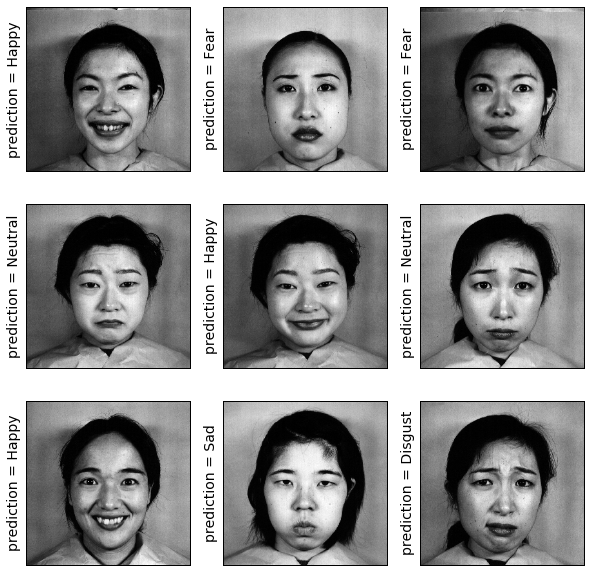

In [19]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)

## Confusion Matrix

70/70 [==============================] - 2s


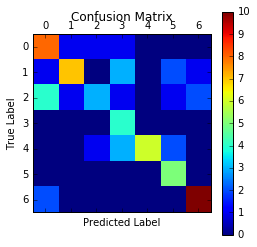

In [35]:
from sklearn.metrics import confusion_matrix

results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Confusion Matrix Key
* 0 - NE: Neutral
* 1 - HA: Happy
* 2 - SA: Sad
* 3 - SU: Surprised
* 4 - AN: Angry
* 5 - DI: Disgust
* 6 - FE: Fear

## Training Loss

In [105]:
# TODO: Retrain the network and actually get the data...

## Filter Visualization

In [37]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)

In [39]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

W Shape:  (6, 5, 5)


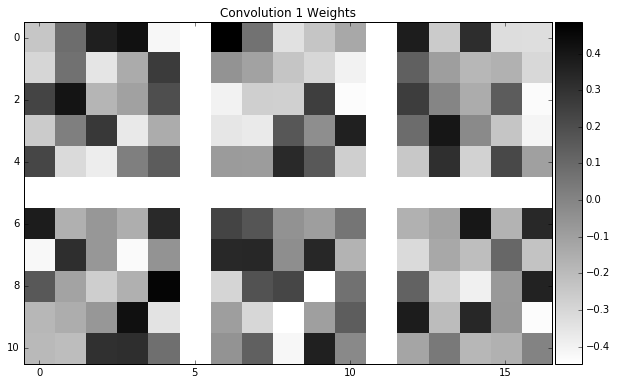

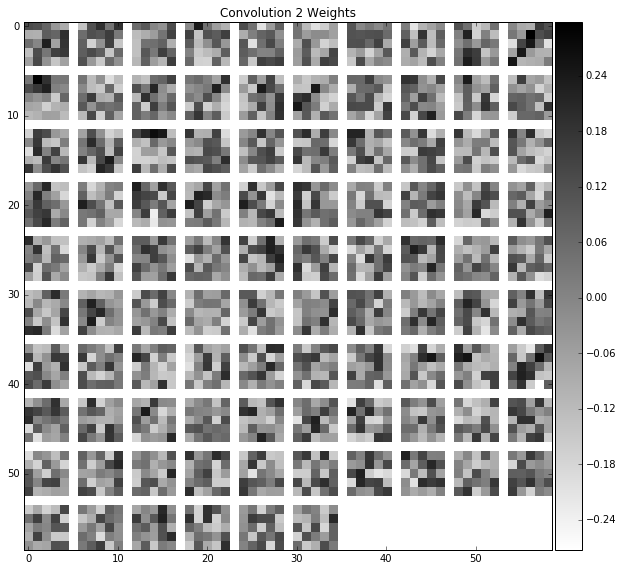

In [100]:
import matplotlib.cm as cm

# Plot First Layer Convolution Weights
_w = model.layers[0].W.get_value(borrow=True)
_w = np.squeeze(_w)
print 'W Shape: ', _w.shape

plt.figure(figsize=(10, 10))
plt.title('Convolution 1 Weights')
nice_imshow(plt.gca(), make_mosaic(_w, 2, 3), cmap=cm.binary)


_w = model.layers[3].W.get_value(borrow=True)
_w = _w.reshape(96, 5, 5)
_w = np.squeeze(_w)

plt.figure(figsize=(10, 10))
plt.title('Convolution 2 Weights')
nice_imshow(plt.gca(), make_mosaic(_w, 10, 10), cmap=cm.binary)